In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np
import scipy.stats as stats
import warnings
warnings.filterwarnings('ignore')

def load_df(file_name):
    df = pd.DataFrame(pd.read_pickle(file_name))
    return df

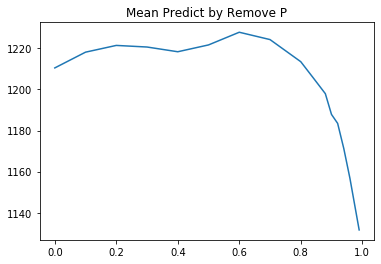

In [8]:
#load broad data and close up on high remove p data
er3 = load_df("compiled_output_jj7_erdos.pkl")
df1=er3.groupby(er3['remove_p']).aggregate(np.mean)
plt.plot(df1.index,df1["mean_pred"])
plt.title("Mean Predict by Remove P")
plt.show()
#Remove failed experiments
er3 = er3[er3['adj_size']>0]

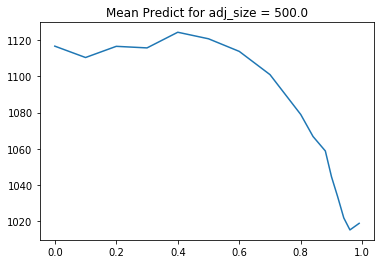

Average value for adj_size = 500.0 is 1078.629667624862


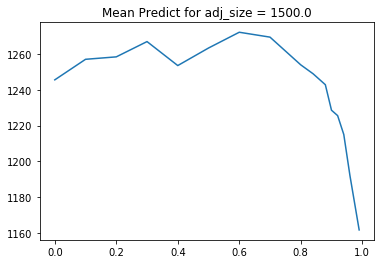

Average value for adj_size = 1500.0 is 1241.0122611464967


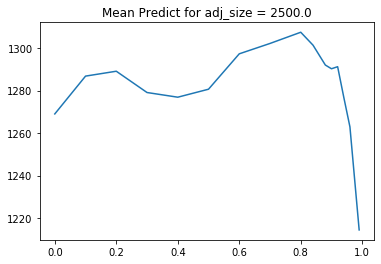

Average value for adj_size = 2500.0 is 1282.3734640995945


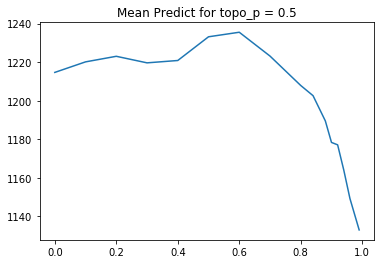

Average value for topo_p = 0.5 is 1199.477309992284


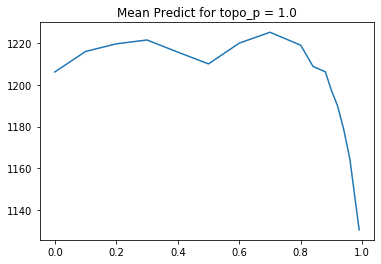

Average value for topo_p = 1.0 is 1201.8579120790216


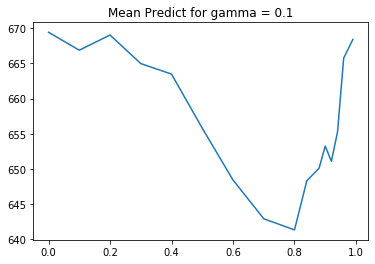

Average value for gamma = 0.1 is 657.1558506944444


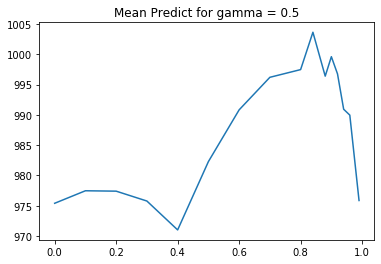

Average value for gamma = 0.5 is 987.3177372685186


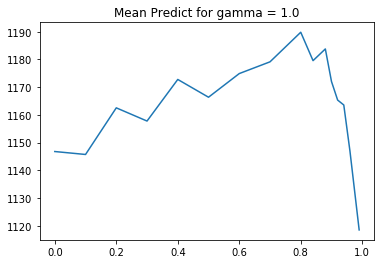

Average value for gamma = 1.0 is 1164.107065972222


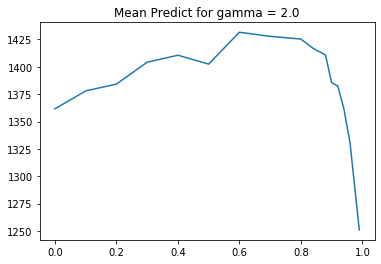

Average value for gamma = 2.0 is 1385.3091059027777


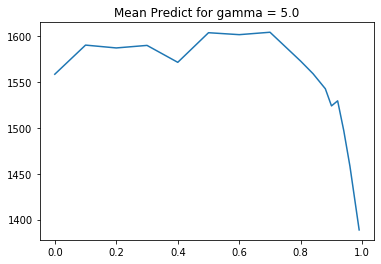

Average value for gamma = 5.0 is 1548.8712123842593


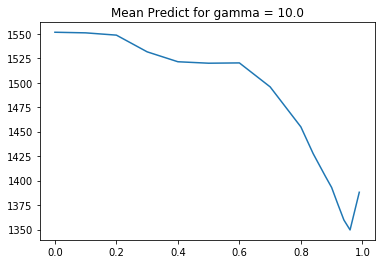

Average value for gamma = 10.0 is 1462.0527573930651


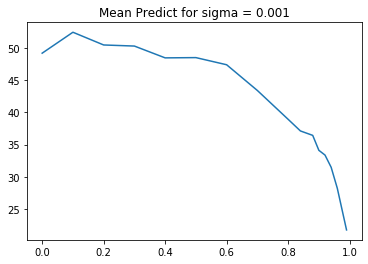

Average value for sigma = 0.001 is 40.71458622685186


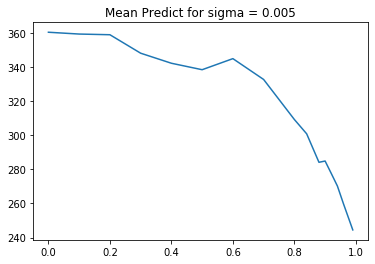

Average value for sigma = 0.005 is 313.6332494212962


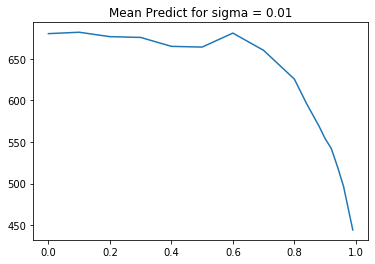

Average value for sigma = 0.01 is 608.2645081018518


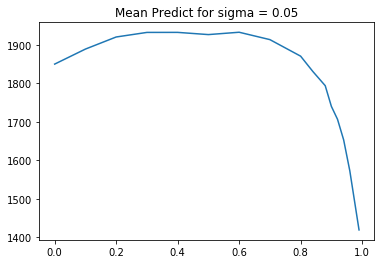

Average value for sigma = 0.05 is 1805.075457175926


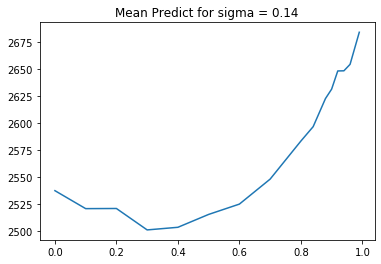

Average value for sigma = 0.14 is 2577.4239756944444


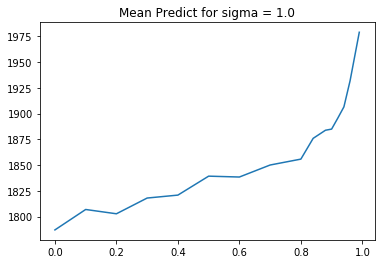

Average value for sigma = 1.0 is 1861.012567025339


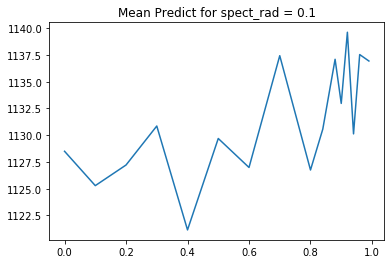

Average value for spect_rad = 0.1 is 1131.170413773148


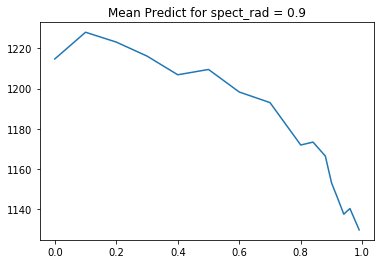

Average value for spect_rad = 0.9 is 1181.6759288194446


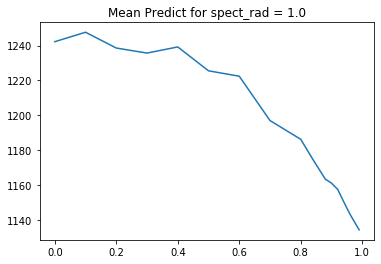

Average value for spect_rad = 1.0 is 1194.976808449074


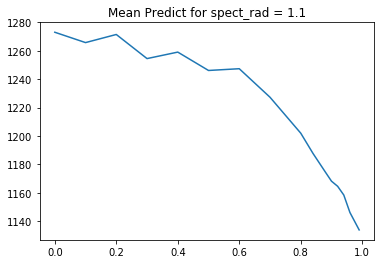

Average value for spect_rad = 1.1 is 1211.223480902778


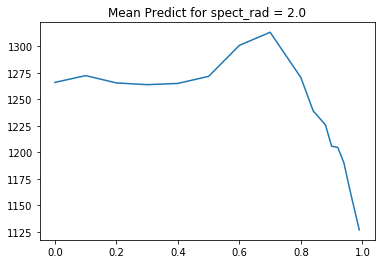

Average value for spect_rad = 2.0 is 1240.252644675926


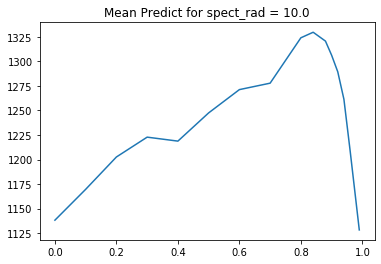

Average value for spect_rad = 10.0 is 1244.8651735423387


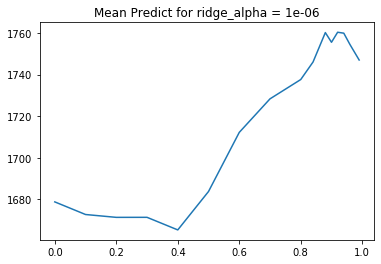

Average value for ridge_alpha = 1e-06 is 1719.0782519998304


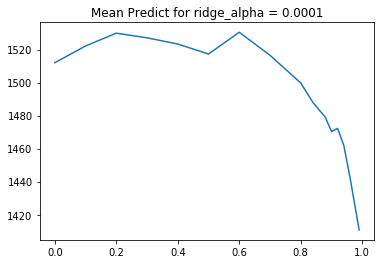

Average value for ridge_alpha = 0.0001 is 1493.9618576388891


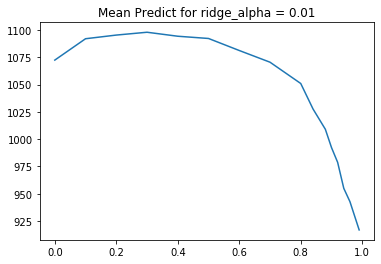

Average value for ridge_alpha = 0.01 is 1035.5655652006171


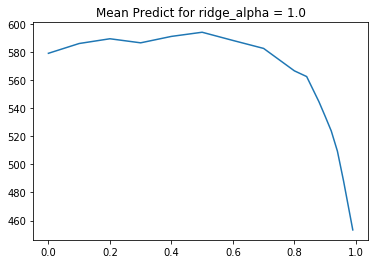

Average value for ridge_alpha = 1.0 is 555.1737615740741


In [7]:
col = ['adj_size', 'topo_p', 'gamma', 'sigma',
       'spect_rad', 'ridge_alpha']
for i in col:
    for t in np.unique(er3[i]):
        #Print the graph for each 
        df1=er3[er3[i]==t].groupby(er3['remove_p'][er3[i]==t]).aggregate(np.mean)
        plt.plot(df1.index,df1["mean_pred"])
        plt.title("Mean Predict for " + i + " = " + str(t))
        plt.show()
        #I included this line so that I can compare easier the averages between graphs
        print("Average value for " + i + " = " + str(t) + " is " + str(np.mean(df1["mean_pred"])))

Conclusions:

adj_size: Remove p is more effective with the 1500 and 2500 size networks. It looks like the larger the network the longer remove_p can help before the prediction tanks.

topo_p: Remove_p is harmful for both topo_p values. It may be less bad at the high topo_p.

gamma: Gamma exhibits very odd behavior. As Gamma increase the peak seems to perhaps move left, but it also has a valley that move as well.

sigma: Below .05 remove_p has a strictly negative effect, and a stricly positive effect above .05. The values below .05 also have very low mean predicts, and therefore aren't very valuable to us.

spect_rad: The end behavior of all the data is 1130 becuase of a bug in our code. Ignoring the behavior after remove_p is larger than 50% we see the odd bevoir of remove_p. At .1 it has no effect. Near one the effective is negative, and above one the effect is positive.

ridge_alpha: Remove_p is more useful the smaller ridge_alpha is.
       
Confounding variables: This an admission of possible errors in my predictions. Interdepence between variables could be a major cause of errors. These conclusions may not hold for other topologies. This data was made with an error in our spectal radius calculator that caused some of the spectral radius not to be scaled. This could cause some issues in every hyperparameter, but definitley makes it conclusion about spectral radius difficult.

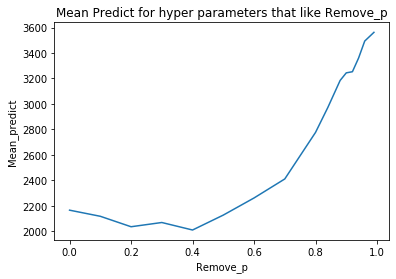

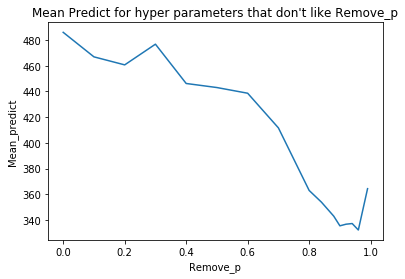

In [17]:
"""Below is a graph of mean predict for the dataset if we don't include values
that have strictly negative results on predict as remove_p increases"""
df1=er3[er3["ridge_alpha"]<.00005][er3["spect_rad"]>1.5][er3["sigma"]>.05][(er3["gamma"]!=10) & (er3["gamma"]!=.1)][er3["topo_p"]==1][er3["adj_size"]!=500].groupby(er3['remove_p'][er3["ridge_alpha"]<.00005][er3["spect_rad"]>1.5][er3["sigma"]>.05][(er3["gamma"]!=10) & (er3["gamma"]!=.1)][er3["topo_p"]==1][er3["adj_size"]!=500]).aggregate(np.mean)
plt.plot(df1.index,df1["mean_pred"])
plt.title("Mean Predict for hyper parameters that like Remove_p")
plt.xlabel("Remove_p")
plt.ylabel("Mean_predict")
plt.show()
df1=er3[er3["ridge_alpha"]>.00005][er3["spect_rad"]<1.5][er3["sigma"]<=.05][(er3["gamma"]==10) | (er3["gamma"]==.1)][er3["topo_p"]!=1][er3["adj_size"]==500].groupby(er3['remove_p'][er3["ridge_alpha"]>.00005][er3["spect_rad"]<1.5][er3["sigma"]<=.05][(er3["gamma"]==10) | (er3["gamma"]==.1)][er3["topo_p"]!=1][er3["adj_size"]==500]).aggregate(np.mean)
plt.plot(df1.index,df1["mean_pred"])
plt.title("Mean Predict for hyper parameters that don't like Remove_p")
plt.xlabel("Remove_p")
plt.ylabel("Mean_predict")
plt.show()

These might not be the best hyperparameters for prediction, but it does prove the concept that there are hyperparameters which remove_p will help. The second graph is lower because several of the lowest predicting hyperparameters got worse as remove_p increased. There are some good hyperparamaters that get worse as we increase remove_p.

Final conclusion between both data set.
Remove_p works better with low ridge_alpha and high sigma. It seems that there might be other effects in common, but these were the clear conclusions.